### The problem

We consider the following non-linear Poisson equation.
$$
-\nabla \cdot \left( q(u) \nabla u\right) = f
$$
define over $\Omega$, with $u = u_{D}$ on $\partial \Omega$. 

We can find our weak form by multiplying both sides of the equation, and integrating over $\Omega$ as usual. We will find that 
$$
F(u;v) = 0 = \int_{\Omega} \left(q(u) \nabla u \cdot \nabla v - fv\right)\,dx
$$
is our weak form. We want to find functions $u$ and $v$ in their appropropiate function spaces such that $F(u;v) = 0$ holds.

> But $F(u;v)$ is non-linear in $u$, so $u$ will be expanded by a system of non-linear equations.

#### Make a test problem

In [14]:
import sympy as spy
import fenics as fe
import numpy as np 

In [2]:
def q(u):
    """
    this is the nonlinear part of the problem
    """
    return 1 + u**2

x, y = spy.symbols("x[0], x[1]")

# this is the test solution
u = 1+x+2*y

# this is divergence of q(u)grad(u)
f = -spy.diff(q(u)*spy.diff(u, x), x) - spy.diff(q(u)*spy.diff(u,y), y)
f = spy.simplify(f)

# these lines converts things into C code
u_code = spy.printing.ccode(u)
f_code = spy.printing.ccode(f)
print("u = ", u_code)
print("f = ", f_code)

u =  x[0] + 2*x[1] + 1
f =  -10*x[0] - 20*x[1] - 10


In [7]:
mesh = fe.UnitSquareMesh(8,8)
V = fe.FunctionSpace(mesh, "CG", 1)

# sympy generated our C++ expressions for us so we can just use them 
u_D = fe.Expression(u_code, degree=1)

def boundary(x, on_boundary):
    return on_boundary

bc = fe.DirichletBC(V, u_D, boundary)

u = fe.Function(V)
v = fe.TestFunction(V)
# computed forcing function
f = fe.Expression(f_code, degree=1)
F = q(u)*fe.dot(fe.grad(u), fe.grad(v))*fe.dx - f*v*fe.dx
fe.solve(F == 0, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


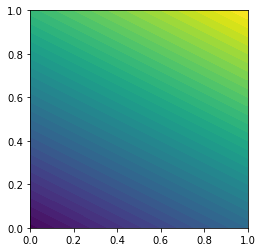

In [9]:
fe.plot(u)

In [11]:
error_L2 = fe.errornorm(u_D, u, "L2")
print("L2 Norm error: ", error_L2)

L2 Norm error:  2.0023388517290497e-16
